# Solution {-}

Evaluation of integrals analytically can be quite laborious (some also impossible), so one should not overlook the possibility of using numerical integration. To demonstrate the effectiveness of the numerical approach, consider the following system driven by white noise whose PSD = 10 units.

\begin{equation*}
  G(s)=\frac{1}{s^2+\omega_0^2}, \quad \omega_0=20\pi
\end{equation*}

Lets say we want to find $E[x^2(t)]$ for $0 \leq t \leq 1$ with a sample spacing of 0.001 seconds.

In [1]:
from numpy import arange, pi, sin, cos
from scipy.integrate import quad
from sympy import inverse_laplace_transform, integrate, symbols
import matplotlib.pyplot as plt

s, t, w0, A = symbols('s t w0 A', positive=True)

# Filter in s-domain
G = 1/(s**2 + w0**2)
display(G)

1/(s**2 + w0**2)

In [2]:
# Filter in t-domain
g = inverse_laplace_transform(G, s, t)
display(g)

sin(t*w0)/w0

In [3]:
EX2 = integrate(A*g**2, t)
display(EX2)

A*(t*w0/2 - sin(t*w0)*cos(t*w0)/2)/w0**3

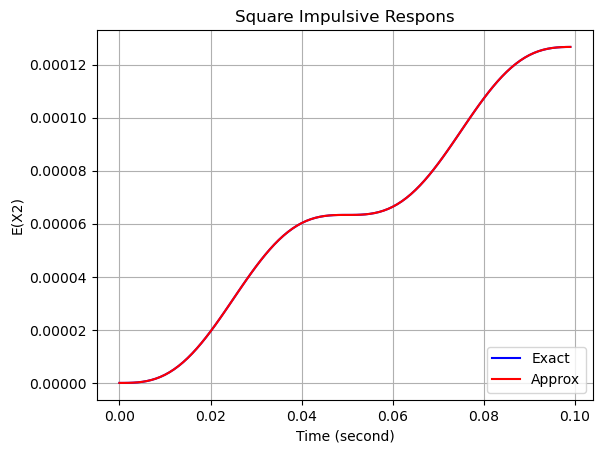

In [4]:
# Numerical values
dt = .001
A = 10
w0 = 20*pi

# Initialize plot vectors
exact = []
approx = []
time=arange(0, 0.1, dt)

# Exact integral
for i in range(100):
    EX2 = A/w0**3*(1/2*w0*i*dt - 1/2*sin(w0*i*dt)*cos(w0*i*dt))
    exact.append(EX2)

# Numerical integration
f = lambda dt: A*(sin(w0*dt)/w0)**2
for i in range(100):
    EX2 = quad(f, 0, i*dt)
    approx.append(EX2[0])

# Pythonic versions of the two loops above
# Exact integral
exact = [A/w0**3 * (0.5*w0*t - 0.5*sin(w0*t)*cos(w0*t)) for t in time]

# Numerical integration
f = lambda dt: A*(sin(w0*dt)/w0)**2
approx = [quad(f, 0, t)[0] for t in time]
    
plt.title('Square Impulsive Respons')
plt.xlabel('Time (second)')
plt.ylabel('E(X2)')
plt.plot(time, exact, 'b', label='Exact')
plt.plot(time, approx, 'r', label='Approx')
plt.legend(loc='lower right')
plt.grid(True, which='both')
plt.show()